In [244]:
##!pip install torch
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [245]:
fruit_dir = r'C:\Users\micke\OneDrive\Documents\its 365\resized_images'

In [246]:
path = fruit_dir
paths = glob.glob(fruit_dir + "/*.jpg")
n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images, replace=False)
all_paths = paths_subset[rand_idxs]

print(n_images)

51


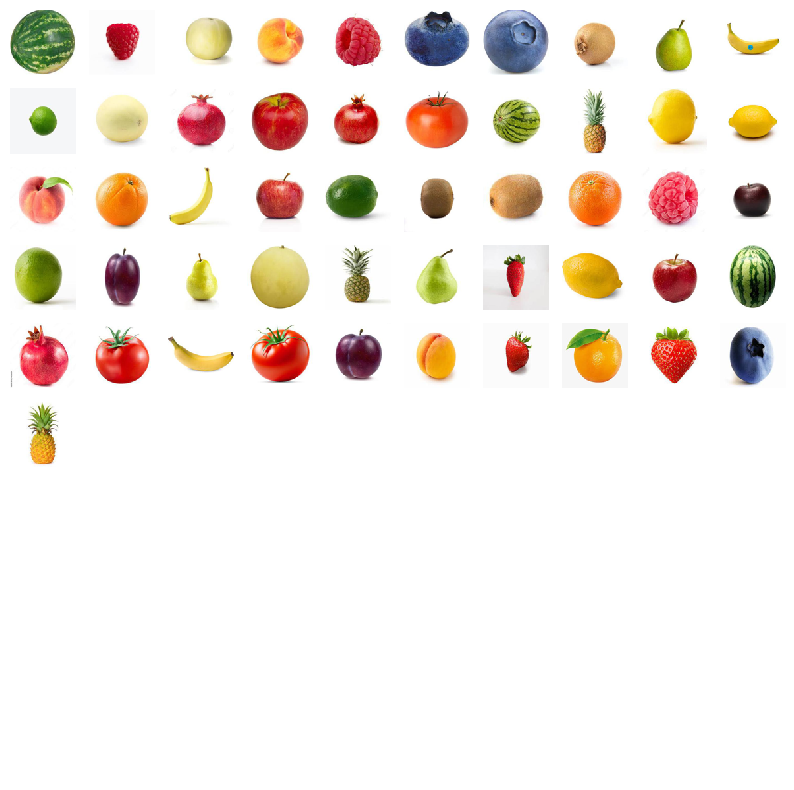

In [247]:
num_rows = 10
num_cols = 10

_, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_rows):
    for j in range(num_cols):
        img_index = i * num_cols + j
        if img_index < len(all_paths):  # Check if the image index is within the range of available paths
            img_path = all_paths[img_index]
            img = Image.open(img_path)
            desired_width = 100  # Example width
            desired_height = 100  # Example height
            img_resized = img.resize((desired_width, desired_height))
            axes[i, j].imshow(img_resized, interpolation='nearest')  # Set interpolation to 'nearest'
            axes[i, j].axis("off")
        else:
            axes[i, j].axis("off")  # Turn off axes for empty subplots

plt.show()

In [248]:
def label_func2(fname):
    fname = fname.replace("C:\\Users\\micke\\OneDrive\\Documents\\its 365\\knn images\\", "")
    temp_name = fname.replace(".jpg", "").split("_")
    conditions = [float(part.split("-")[1]) for part in temp_name[1:]]
    return conditions

    y0 = temp_name[0]  # Fruit type
    y1 = float(temp_name[1].replace("Weight", ""))  # Weight
    y2 = float(temp_name[2].replace("Color", ""))  # Color
    y3 = float(temp_name[3].replace("Roundness", ""))  # Roundness
    y4 = float(temp_name[4].replace("TextureSmoothness", ""))  # Texture smoothness
    y5 = float(temp_name[5].replace("Symmetry", ""))  # Symmetry

    return [fname, y0, y1, y2, y3, y4, y5]

In [249]:
list_imgs_train = []
list_label_vectors = []

for img_name in paths:
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((39, 140))
    
    img_np = np.array(my_img)
    
    print(img_np.shape)  # Check the shape of the image array
    
    conditions = label_func2(img_name)
    
    if img_np.ndim == 2:  # Check if image is grayscale
        # Convert grayscale to RGB
        img_np = np.stack((img_np,) * 3, axis=-1)
    
    print(img_np.shape)  # Check the shape after conversion
    
    list_imgs_train.append(img_np)
    list_label_vectors.append(conditions)
for img_np in list_imgs_train[:5]:
    print(img_np[:10])  # Print the first 10 rows of the first few images

(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)
(140, 39, 3)

In [250]:
X =  list_imgs_train
y =  list_label_vectors 

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

40
11
40
11


In [252]:
X_train[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]]

In [253]:
list_ids_train = []
list_features_train = []
list_imgs_train = []

for index in range(len(X_train)):
    reg_vals = y_train[index]
    target = np.zeros(5)  # Assuming you have 5 conditions
    
    # Convert reg_vals to a string representation of conditions
    reg_vals_str = str(reg_vals)
    
    # Extracting conditions from reg_vals
    conditions = reg_vals_str.split('_')
    
    # Processing each condition
    for condition in conditions:
        if '-' in condition:
            condition_name, condition_value = condition.split('-')
            if condition_name == 'W':
                target[0] = float(condition_value)
            elif condition_name == 'C':
                target[1] = float(condition_value)
            elif condition_name == 'R':
                target[2] = float(condition_value)
            elif condition_name == 'T':
                target[3] = float(condition_value)
            elif condition_name == 'S':
                target[4] = float(condition_value)

    single_np_img = X_train[index]

    list_ids_train.append(reg_vals[0])
    list_imgs_train.append(single_np_img)
    list_features_train.append(target)

In [254]:
list_imgs_train[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]]

In [255]:
list_ids_test = []
list_features_test = []
list_imgs_test = []

for index in range(len(X_train)):
    reg_vals = y_train[index]
    target = np.zeros(5)  # Assuming you have 5 conditions
    
    # Convert reg_vals to a string representation of conditions
    reg_vals_str = str(reg_vals)
    
    # Extracting conditions from reg_vals
    conditions = reg_vals_str.split('_')
    
    # Processing each condition
    for condition in conditions:
        if '-' in condition:
            condition_name, condition_value = condition.split('-')
            if condition_name == 'W':
                target[0] = float(condition_value)
            elif condition_name == 'C':
                target[1] = float(condition_value)
            elif condition_name == 'R':
                target[2] = float(condition_value)
            elif condition_name == 'T':
                target[3] = float(condition_value)
            elif condition_name == 'S':
                target[4] = float(condition_value)

    single_np_img = X_train[index]

    list_ids_test.append(reg_vals[0])
    list_imgs_test.append(single_np_img)
    list_features_test.append(target)

In [256]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [257]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(40, 5)
(40, 5)


In [258]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [259]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [260]:
list_imgs_train[17]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 255],
        [255, 255, 255]]

In [261]:
list_imgs_train[17].shape

(140, 39, 3)

In [262]:
list_imgs_train_stretched = [the_img_np.reshape(-1) for the_img_np in list_imgs_train]

In [263]:
list_imgs_train_stretched[0]

array([251, 251, 251, ..., 251, 251, 251], dtype=uint8)

In [264]:
list_imgs_train_stretched[4].shape

(16380,)

In [265]:
list_imgs_train_stretched[4][:1000]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 253,
       255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [266]:
list_imgs_train_stretched[7].shape

(16380,)

In [267]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

In [268]:
np_list_imgs_train_stretched.shape

(40, 16380)

In [269]:
np_list_imgs_train_stretched[3]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [270]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [271]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379
0,251,251,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9,245,246,248,245,246,248,245,246,248,245,...,248,245,246,248,245,246,248,245,246,248


In [272]:
DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")

In [273]:
url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]

In [274]:
url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]

In [275]:
url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]

In [276]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [289]:
from sklearn.neighbors import NearestNeighbors
def find_k_nearest_neighbors(test_x, train_data):
    # Initialize the nearest neighbor model
    nn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
    
    # Fit the model to the training data
    nn_model.fit(train_data)
    
    # Find the indices of the k-nearest neighbors
    _, indices = nn_model.kneighbors([test_x])
    
    return indices[0]

def predict(test_x):
    # Find k nearest neighbors
    k_neighbor_indices = find_k_nearest_neighbors(test_x, pd_imgs_np_train_np)
    
    # Reshape images
    selected_imgs_to_avg = [pd_imgs_np_train_np[i].reshape((140, 39)) for i in k_neighbor_indices]
    
    return selected_imgs_to_avg

def generate_img_per_index(index):
    selected_imgs_to_avg = predict(conditions_matrix_test[index])
    the_test_conditions = conditions_matrix_test[index]
    
    avg_gen_img = np.mean(np.array(selected_imgs_to_avg), axis=0)
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image

In [290]:
np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [291]:
def generate_img_per_index(index):
    selected_imgs_to_avg = predict(conditions_matrix_test[index])
    the_test_conditions = conditions_matrix_test[index]

    # Check the shape of selected_imgs_to_avg
    print("Shape of selected_imgs_to_avg:", selected_imgs_to_avg.shape)

    # Print the indices causing the error
    print("Indices causing the error:", [i for i, img in enumerate(selected_imgs_to_avg) if img.size != 16380])

    # Reshape the images if necessary
    selected_imgs_to_avg = [img.reshape((140, 39)) if img.size == 16380 else img for img in selected_imgs_to_avg]

    # Convert to numpy array
    selected_imgs_to_avg = np.array(selected_imgs_to_avg)

    # Take the mean along the first axis (num_images)
    avg_gen_img = np.mean(selected_imgs_to_avg, axis=0)
    avg_gen_img = avg_gen_img.astype(int)

    # Check the shape of avg_gen_img
    print("Shape of avg_gen_img:", avg_gen_img.shape)

    # Convert the average generated image to PIL format
    gen_pil_image = Image.fromarray(avg_gen_img)

    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)

    return the_test_conditions, gen_pil_image, real_pil_image

In [292]:
the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(17)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")

ValueError: X has 5 features, but NearestNeighbors is expecting 16380 features as input.